# MapReduce / SVM

## Question 1
Suppose our input data to a map-reduce operation consists of integer values (the keys are not important). The map function takes an integer i and produces the list of pairs (p,i) such that p is a prime divisor of i. For example, map(12) = [(2,12), (3,12)]. The reduce function is addition. That is, reduce(p, [i1, i2, ..., ik]) is (p, i1 + i2 +...+ ik). Compute the output, if the input is the set of integers 15, 21, 24, 30, 49.

In [1]:
from collections import defaultdict
import math

# determine if an integer n is a prime number
def isPrime(n):
    if n == 2:
        return True
    if n%2 == 0 or n <= 1:
        return False
    sqr = int(math.sqrt(n)) + 1
    for divisor in range(3, sqr, 2):
        if n%divisor == 0:
            return False
    return True

# Output the prime divisors of each integers
reduce = defaultdict(list)
def map(integer):
    output = []
    for i in range(2, integer):
        if isPrime(i) and integer%i == 0:
            output.append(i)
    return output

# Input list of integers
integer = [15, 21, 24, 30, 49]

# Print every integer and its prime divisor(s)
# eg. The prime divisors of 15 are 3 & 5
for n in integer:
    print "Integer:", n
    primeDivisor = map(n)
    print "Prime divisor(s):", primeDivisor
    for key in primeDivisor:
        reduce[key].append(n)

Integer: 15
Prime divisor(s): [3, 5]
Integer: 21
Prime divisor(s): [3, 7]
Integer: 24
Prime divisor(s): [2, 3]
Integer: 30
Prime divisor(s): [2, 3, 5]
Integer: 49
Prime divisor(s): [7]


In [2]:
for key, values in reduce.items():
    print "prime divisor and the sum of integers:", key, ",", sum(values)

prime divisor and the sum of integers: 2 , 54
prime divisor and the sum of integers: 3 , 90
prime divisor and the sum of integers: 5 , 45
prime divisor and the sum of integers: 7 , 70


## Question 2
Use the matrix-vector multiplication and apply the Map function to this matrix and vector:

| 1 | 2 | 3 | 4 | | 1 |
|---|---|---|---| |---|
| 5 | 6 | 7 | 8 | | 2 |
| 9 | 10 | 11 | 12 | | 3 |
| 13 | 14 | 15 | 16 | | 4 |

Then, identify the key-value pairs that are output of Map.

In [3]:
import numpy as np
import itertools

In [4]:
M = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16],])

v = np.array([1, 2, 3, 4])

In [5]:
def mr(M, v):
    t = []
    mr, mc = M.shape
    for i in range(mc):
        for j in range(mr):
            t.append((i, M[i, j] * v[j]))

    t = sorted(t, key=lambda x:x[0])
    for x in t:
        print (x[0]+1, x[1])

    r = np.zeros((mr, 1))
    for key, vals in itertools.groupby(t, key=lambda x:x[0]):
        vals = [x[1] for x in vals]
        r[key] = sum(vals)
        print '%s, %s' % (key, sum(vals))
    return r.transpose()

In [6]:
#print np.dot(M, v.transpose())
print mr(M, v)

(1, 1)
(1, 4)
(1, 9)
(1, 16)
(2, 5)
(2, 12)
(2, 21)
(2, 32)
(3, 9)
(3, 20)
(3, 33)
(3, 48)
(4, 13)
(4, 28)
(4, 45)
(4, 64)
0, 30
1, 70
2, 110
3, 150
[[  30.   70.  110.  150.]]


## Question 3
Suppose we have the following relations:

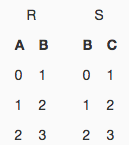

In [7]:
from IPython.display import Image
Image(filename='relations.jpeg')

and we take their natural join. Apply the Map function to the tuples of these relations. Then, construct the elements that are input to the Reduce function. Identify these elements.

In [8]:
import numpy as np
import itertools

In [9]:
R = [(0, 1),
     (1, 2),
     (2, 3)]

S = [(0, 1),
     (1, 2),
     (2, 3)]

In [10]:
def hash_join(R, S):
    h = {}
    for a, b in R:
        h.setdefault(b, []).append(a)

    j = []
    for b, c in S:
        if not h.has_key(b):
            continue
        for r in h[b]:
            j.append( (r, b, c) )

    return j

In [11]:
def mr(R, S):
    m = []
    for a, b in R:
        m.append( (b, ('R', a)) )
    for b, c in S:
        m.append( (b, ('S', c)) )

    m = sorted(m, key=lambda x:x[0])

    r = []
    for key, vals in itertools.groupby(m, key=lambda x:x[0]):
        vals = [x[1] for x in vals]
        print key, vals
        rs = [x for x in vals if x[0] == 'R']
        ss = [x for x in vals if x[0] == 'S']
        for ri in rs:
            for si in ss:
                r.append( (ri[1], key, si[1]) )
    return r

In [12]:
print hash_join(R, S)
print mr(R, S)

[(0, 1, 2), (1, 2, 3)]
0 [('S', 1)]
1 [('R', 0), ('S', 2)]
2 [('R', 1), ('S', 3)]
3 [('R', 2)]
[(0, 1, 2), (1, 2, 3)]


## Question 4
The figure below shows two positive points (purple squares) and two negative points (green circles): 

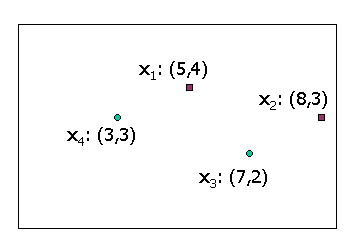

In [1]:
from IPython.display import Image
Image(filename='svm1.jpeg')

That is, the training data set consists of:
- (x1,y1) = ((5,4),+1)
- (x2,y2) = ((8,3),+1)
- (x3,y3) = ((7,2),-1)
- (x4,y4) = ((3,3),-1)

Our goal is to find the maximum-margin linear classifier for this data. In easy cases, the shortest line between a positive and negative point has a perpendicular bisector that separates the points. If so, the perpendicular bisector is surely the maximum-margin separator. Alas, in this case, the closest pair of positive and negative points, x2 and x3, have a perpendicular bisector that misclassifies x1 as negative, so that won't work.

The next-best possibility is that we can find a pair of points on one side (i.e., either two positive or two negative points) such that a line parallel to the line through these points is the maximum-margin separator. In these cases, the limit to how far from the two points the parallel line can get is determined by the closest (to the line between the two points) of the points on the other side. For our simple data set, this situation holds.

Consider all possibilities for boundaries of this type, and express the boundary as w.x+b=0, such that w.x+b≥1 for positive points x and w.x+b≤-1 for negative points x. Assuming that w = (w1,w2), identify the value of w1, w2, and b.

In [14]:
import math
import numpy as np

In [15]:
P = [((5, 4), 1),
     ((8, 3), 1),
     ((3, 3), -1),
     ((7, 2), -1)]

In [16]:
def line(pl0, pl1, p):
    dx, dy = pl1[0] - pl0[0], pl1[1] - pl0[1]
    a = abs((pl1[1] - pl0[1]) * p[0] - (pl1[0] - pl0[0]) * p[1] + pl1[0]*pl0[1] - pl0[0]*pl1[1])
    return a / math.sqrt(dx*dx + dy*dy)

In [17]:
def closest(L, pts):
    dist = [line(L[0][0], L[1][0], x[0]) for x in pts]
    ix = np.argmin(dist)
    return pts[ix], dist[ix]

In [18]:
def solve(A, B):
    # find the point in B closest to the line through both points in A
    p, d = closest(A, B)

    M = np.hstack((
        np.array([list(x[0]) for x in A] + [list(p[0])]),
        np.ones((3, 1))))
    b = np.array([x[1] for x in A] + [p[1]])
    x = np.linalg.solve(M, b)
    return x, d

In [19]:
S = [solve([a for a in P if a[1] == 1], [a for a in P if a [1] == -1]),
     solve([a for a in P if a[1] == -1], [a for a in P if a [1] == 1])]

In [20]:
ix = np.argmax([x[1] for x in S])
x = S[ix][0]
print 'w1 = %0.2f' % x[0]
print 'w2 = %0.2f' % x[1]
print 'b = %0.2f' % x[2]

w1 = 0.50
w2 = 1.50
b = -7.50


## Question 5
Consider the following training set of 16 points. The eight purple squares are positive examples, and the eight green circles are negative examples.

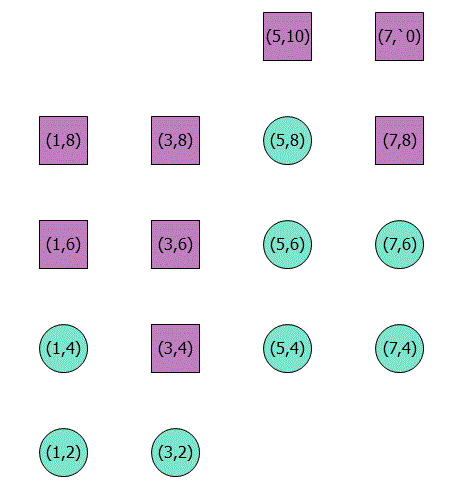

In [21]:
Image(filename='newsvm4.jpeg')

We propose to use the diagonal line with slope +1 and intercept +2 as a decision boundary, with positive examples above and negative examples below. However, like any linear boundary for this training set, some examples are misclassified. We can measure the goodness of the boundary by computing all the slack variables that exceed 0, and then using them in one of several objective functions. In this problem, we shall only concern ourselves with computing the slack variables, not an objective function.

To be specific, suppose the boundary is written in the form w.x+b=0, where w = (-1,1) and b = -2. Note that we can scale the three numbers involved as we wish, and so doing changes the margin around the boundary. However, we want to consider this specific boundary and margin. Determine the slack for each of the 16 points.

In [22]:
import numpy as np

In [23]:
pos = [(5, 10),
       (7, 10),
       (1, 8),
       (3, 8),
       (7, 8),
       (1, 6),
       (3, 6),
       (3, 4)]

neg = [(5, 8),
       (5, 6),
       (7, 6),
       (1, 4),
       (5, 4),
       (7, 4),
       (1, 2),
       (3, 2)]

In [24]:
C = [(x, 1) for x in pos] + [(x, -1) for x in neg]

w, b = np.array([-1, 1]), -2

In [25]:
d = np.dot(np.array([list(x[0]) for x in C]), w) + b

print("Points"+"\t"+"Slack")
for i, m in enumerate(np.sign(d) == np.array([x[1] for x in C])):
    if C[i][1] == 1:
        slack = 1 - d
    else:
        slack = 1 + d
    #print "%s %d %0.2f %0.2f" % (C[i][0], C[i][1], d[i], slack[i])
    print "%s\t%0.2f" % (C[i][0], slack[i])

Points	Slack
(5, 10)	-2.00
(7, 10)	0.00
(1, 8)	-4.00
(3, 8)	-2.00
(7, 8)	2.00
(1, 6)	-2.00
(3, 6)	0.00
(3, 4)	2.00
(5, 8)	2.00
(5, 6)	0.00
(7, 6)	-2.00
(1, 4)	2.00
(5, 4)	-2.00
(7, 4)	-4.00
(1, 2)	0.00
(3, 2)	-2.00


## Question 6
Below we see a set of 20 points and a decision tree for classifying the points.

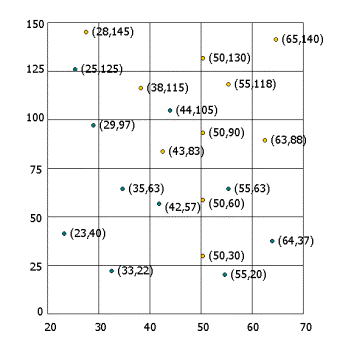

In [26]:
Image(filename='gold.jpeg')

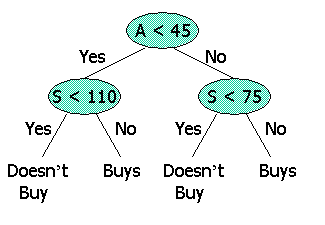

In [27]:
Image(filename='dectree1.jpeg')

To be precise, the 20 points represent (Age,Salary) pairs of people who do or do not buy gold jewelry. Age (appreviated A in the decision tree) is the x-axis, and Salary (S in the tree) is the y-axis. Those that do are represented by gold points, and those that do not by green points. The 10 points of gold-jewelry buyers are:

(28,145), (38,115), (43,83), (50,130), (50,90), (50,60), (50,30), (55,118), (63,88), and (65,140).

The 10 points of those that do not buy gold jewelry are:

(23,40), (25,125), (29,97), (33,22), (35,63), (42,57), (44, 105), (55,63), (55,20), and (64,37).

Some of these points are correctly classified by the decision tree and some are not. Determine the classification of each point, and then indicate the points that are misclassified.

In [28]:
A = 0
S = 1

pos = [(28,145),
       (38,115),
       (43,83),
       (50,130),
       (50,90),
       (50,60),
       (50,30),
       (55,118),
       (63,88),
       (65,140)]

neg = [(23,40),
       (25,125),
       (29,97),
       (33,22),
       (35,63),
       (42,57),
       (44, 105),
       (55,63),
       (55,20),
       (64,37)]

In [29]:
def classify(p):
    if p[A] < 45:
        return p[S] >= 110
    else:
        return p[S] >= 75

In [30]:
e = [p for p, v in zip(pos, [classify(x) for x in pos]) if not v] + \
    [p for p, v in zip(neg, [classify(x) for x in neg]) if v]
print e

[(43, 83), (50, 60), (50, 30), (25, 125)]
